In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading training data    
data = np.load(species_train.npz')
train_locs = data['train_locs']  # 2D array, rows are number of datapoints and 
                                 # columns are "latitude" and "longitude"
train_ids = data['train_ids']    # 1D array, entries are the ID of the species 
                                 # that is present at the corresponding location in train_locs
species = data['taxon_ids']      # list of species IDe. Note these do not necessarily start at 0 (or 1)
species_names = dict(zip(data['taxon_ids'], data['taxon_names']))  # latin names of species 

# loading test data 
data_test = np.load(species_test.npz', allow_pickle=True)
test_locs = data_test['test_locs']    # 2D array, rows are number of datapoints 
                                      # and columns are "latitude" and "longitude"
# data_test['test_pos_inds'] is a list of lists, where each list corresponds to 
# the indices in test_locs where a given species is present, it can be assumed 
# that they are not present in the other locations 
test_pos_inds = dict(zip(data_test['taxon_ids'], data_test['test_pos_inds'])) 

# Data Visualisation

Train Stats:
Number of species in train set:            500
Number of train locations:                 272037
Average number of locations per species:   544.074
Minimum number of locations for a species: 50
Maximum number of locations for a species: 2000

Displaying random species:
8269 - Dicrurus forficatus
33002 - Furcifer verrucosus
559131 - Sanzinia madagascariensis


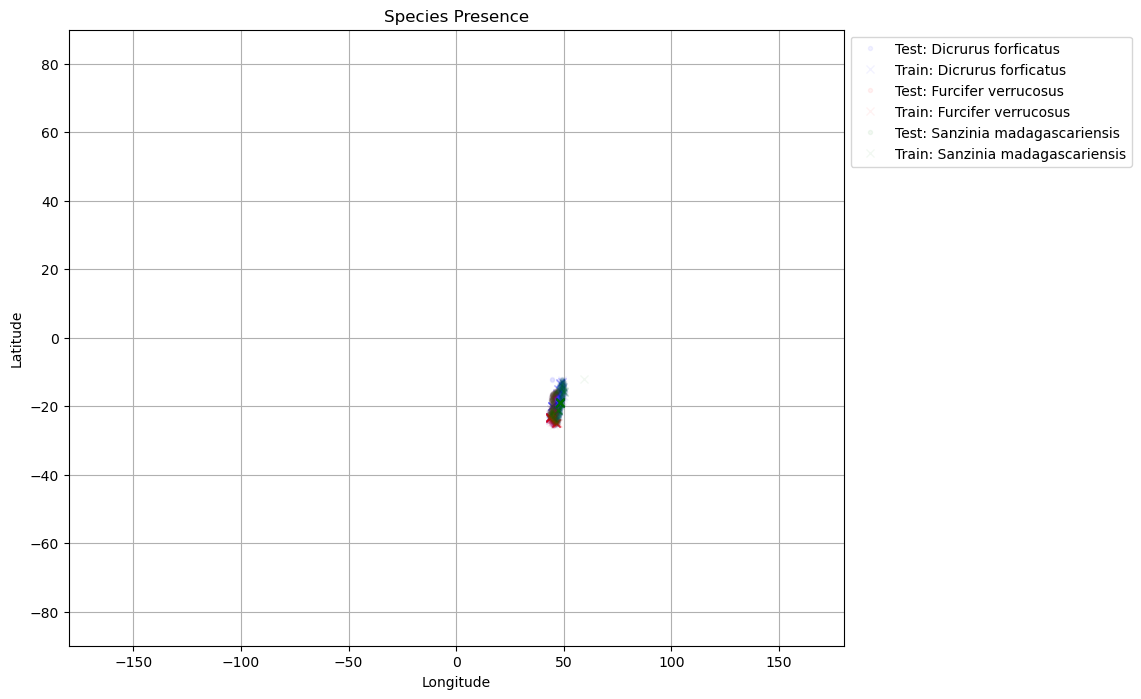

In [160]:
# data stats
print('Train Stats:')
print('Number of species in train set:           ', len(species))
print('Number of train locations:                ', train_locs.shape[0])
_, species_counts = np.unique(train_ids, return_counts=True)
print('Average number of locations per species:  ', species_counts.mean())
print('Minimum number of locations for a species:', species_counts.min())
print('Maximum number of locations for a species:', species_counts.max())


import numpy as np
import matplotlib.pyplot as plt

##Plotting a list of species instead of random species
species_list = [8269, 33002, 559131]

num_species = len(species_list)

plt.close('all')
plt.figure(figsize=(10, 8))

print('\nDisplaying random species:')
for i, sp in enumerate(species_list):
    print(f'{sp} - {species_names[sp]}')
    
    # Get test locations where the selected species is present
    test_inds_pos = test_pos_inds[sp]  
    plt.plot(test_locs[test_inds_pos, 1], test_locs[test_inds_pos, 0], 
             '.', color=colors[i % len(colors)], label=f'Test: {species_names[sp]}', alpha=0.05)

    # Get train locations where the selected species is present
    train_inds_pos = np.where(train_ids == sp)[0]
    plt.plot(train_locs[train_inds_pos, 1], train_locs[train_inds_pos, 0], 
             'x', color=colors[i % len(colors)], label=f'Train: {species_names[sp]}', alpha=0.05)

plt.title('Species Presence')
plt.grid(True)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
